In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Строка names содержит имена в формате 'Name1 Surname1, Name2 Surname2, …'. Поместите в переменную names_list список со строками имён – ['Name1 Surname1', 'Name2 Surname2', …]


In [2]:
names='Name1 Surname1, Name2 Surname2'

In [3]:
print('Hello\nWorld')

Hello
World


In [4]:
names_list=names.split(',')

In [5]:
names_list

['Name1 Surname1', ' Name2 Surname2']

### В переменной df содержатся данные как на картинке task2.png (находится в папке с заданием) Отберите из них только те, где wealth 'medium', а возраст больше 35, и поместите в переменную medium_35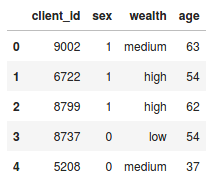

In [6]:
df=pd.DataFrame(data={
    'client_id':[9002,6722,8799,8737,5208],
    'sex':[1,1,1,0,0],
    'wealth':['medium','high','high','low','medium'],
    'age':[63,54,62,54,37]},index=[0,1,2,3,4])

In [7]:
df

,client_id,sex,wealth,age
0,9002,1,medium,63
1,6722,1,high,54
2,8799,1,high,62
3,8737,0,low,54
4,5208,0,medium,37


In [8]:
medium_35=df.query("wealth=='medium' and age>35")

In [9]:
medium_35

,client_id,sex,wealth,age
0,9002,1,medium,63
4,5208,0,medium,37


### Ваш коллега-новичок перепутал названия колонок в таблице из предыдущих заданий и прислал вам такой вариант task3.png (находится в папке с заданием)<br> Приведите таблицу к каноничному виду, сохранив её в ту же переменную df, где сейчас находится нестандартно наименнованная таблица (воспользуйтесь методом rename)<br> Note: колонка называется Клиент id - шрифт плохо передаёт кейс i в id
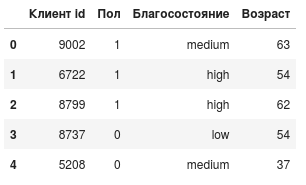

In [10]:
df.columns

Index(['client_id', 'sex', 'wealth', 'age'], dtype='object')

In [11]:
wrong_df=df.rename(columns={'client_id':'Клиент Id', 'sex':'Пол', 'wealth':'Благосостояние', 'age':'Возраст'})


In [12]:
wrong_df

,Клиент Id,Пол,Благосостояние,Возраст
0,9002,1,medium,63
1,6722,1,high,54
2,8799,1,high,62
3,8737,0,low,54
4,5208,0,medium,37


In [13]:
df=wrong_df.rename(columns={'Клиент Id':'client_id', 'Пол':'sex', 'Благосостояние':'wealth', 'Возраст':'age'})

In [14]:
df

,client_id,sex,wealth,age
0,9002,1,medium,63
1,6722,1,high,54
2,8799,1,high,62
3,8737,0,low,54
4,5208,0,medium,37


### Добавьте в исследуемый нами датафрэйм df колонку older_than_30, в которой будет храниться больше ли возраст 30 лет (булиновское значение)


In [15]:
df['older_than_30']=df.age>30

In [16]:
df

,client_id,sex,wealth,age,older_than_30
0,9002,1,medium,63,True
1,6722,1,high,54,True
2,8799,1,high,62,True
3,8737,0,low,54,True
4,5208,0,medium,37,True


### А теперь получите серию с числом уникальных значений для каждой колонки и присвойте её переменной unique_num

In [17]:
df.nunique()

client_id        5
sex              2
wealth           3
age              4
older_than_30    1
dtype: int64

### У нас появились новые данные! Переменная data хранит в себе датафрэйм следующего вида: task6.png<br><br>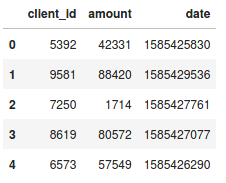Проведите inner join датафрейма data с df из предыдущего шага, объединив их по колонке client_id, и поместите результат в переменную full_data (да, придумывать переменные иногда бывает сложно)

In [20]:
df

,client_id,sex,wealth,age,older_than_30
0,9002,1,medium,63,True
1,6722,1,high,54,True
2,8799,1,high,62,True
3,8737,0,low,54,True
4,5208,0,medium,37,True


In [21]:
data=pd.DataFrame(data={'client_id':[5208,9002,7250,8799,6722],
                        'amount':[42331,88420,1714,80572,57549],
                        'date':[1585425830,1585429536,1585427761,1585427077,1585426290]},
                         index=[0,1,2,3,4])

In [22]:
data

,client_id,amount,date
0,5208,42331,1585425830
1,9002,88420,1585429536
2,7250,1714,1585427761
3,8799,80572,1585427077
4,6722,57549,1585426290


In [23]:
full_data=data.merge(df,on='client_id',how='inner')

In [24]:
full_data

,client_id,amount,date,sex,wealth,age,older_than_30
0,5208,42331,1585425830,0,medium,37,True
1,9002,88420,1585429536,1,medium,63,True
2,8799,80572,1585427077,1,high,62,True
3,6722,57549,1585426290,1,high,54,True


А теперь создадим свою собственную функцию!
Напишите функцию read_n_agg, которая 
- принимает на вход один параметр – путь к файлу
- считывает переданный файл, в котором разделителем является ;
- считает средний заработок (income) по каждой компании (company), перенося колонку company в индекс (as_index=True)
- возвращает результат этих действий (агрегированный датафрэйм)
Данные выглядят как в task7.png, датасэт в файле companies.csv
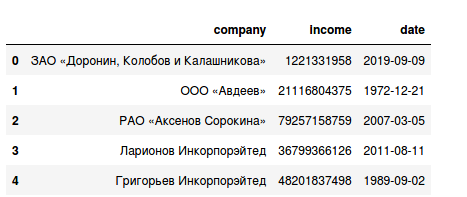

In [39]:
def read_n_agg(file):
        df=pd.read_csv(file,sep=';')
        return df.groupby('company',as_index=True)\
        .agg({'income':'mean'})
        
        

In [40]:
read_n_agg('companies.csv')

,income
company,
En +,9.962187e+10
"АО «Александрова, Савельев и Мельникова»",7.206782e+10
АО «Андреев-Анисимов»,6.931948e+09
АО «Андреев-Макарова»,8.934380e+10
АО «Большаков Кошелева»,7.860861e+10
...,...
Щекиноазот,4.309092e+10
Щукин Лимитед,6.703036e+10
Эйвон Бьюти Продактс Компани (Avon),2.503657e+10


### Проверьте, с какой платформы было сделано больше всего заказов. В ответе укажите значение в %, округлённое до целого.

In [44]:
taxi=pd.read_csv('taxi_peru.csv',sep=';', parse_dates=['start_at', 'end_at', 'arrived_at'])

In [48]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [47]:
taxi[['start_at', 'end_at', 'arrived_at']].dtypes

start_at      datetime64[ns]
end_at        datetime64[ns]
arrived_at    datetime64[ns]
dtype: object

In [58]:
round(taxi.source.value_counts().max()/taxi.source.shape[0]*100)

42

In [59]:
taxi.source.value_counts(normalize=True)

iPhone     0.423743
web        0.331956
Android    0.213546
iPad       0.024839
Wap        0.005916
Name: source, dtype: float64

In [62]:
taxi.source.value_counts(normalize=True).mul(100).max().round()

42.0

### Проверим, как распределены оценки водителей (driver_score). Для подготовки данных выполните следующие шаги:
- Посчитайте частоту встречаемости каждой из оценок
- Переведите в проценты и округлите до 2 знаков после точки (.mul(100).round(2))
- Сбросьте индексы
- Переименуйте колонки в driver_score и percentage
- Отсортируйте по driver_score в порядке возрастания (от 0 до 5)
- Запишите результат в driver_score_counts
Полезные функции:
.mul() – умножение, более удобный вариант для использования в цепочке методов 
.round() – округление
.reset_index() – сбросить индекс
.value_counts() – сколько раз встречается каждое значение переменной


In [66]:
driver_scores=taxi.driver_score.value_counts(normalize=True).mul(100).round(2)

In [75]:
driver_scores=driver_scores.reset_index()

In [77]:
driver_scores.rename(columns={'index':'driver_score','driver_score':'percentage'}, inplace=True)

In [78]:
driver_scores

,driver_score,percentage
0,5.0,58.81
1,4.0,21.88
2,0.0,14.30
3,3.0,2.97
4,1.0,1.23
5,2.0,0.81


In [80]:
driver_score_counts=driver_scores.sort_values('driver_score')

In [81]:
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


### Теперь строим график! (task11.png) Сначала импортируем библиотеки:
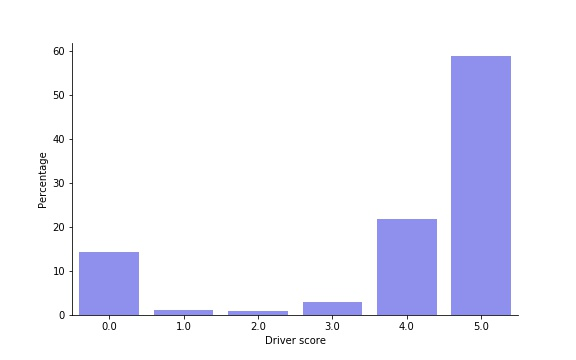
import seaborn as sns<br>
import matplotlib.pyplot as plt<br>
Укажите, какую из четырех строчек в нижепредставленном коде нужно исправить, чтобы получить следующий график:
ax = sns.barplot(x=driver_score, y=percentage, data=driver_score_counts, color='blue', alpha=0.5)<br>
ax.set(xlabel='Driver score', ylabel='Percentage')<br>
sns.despine()  # убрать часть рамки графика
plt.show()

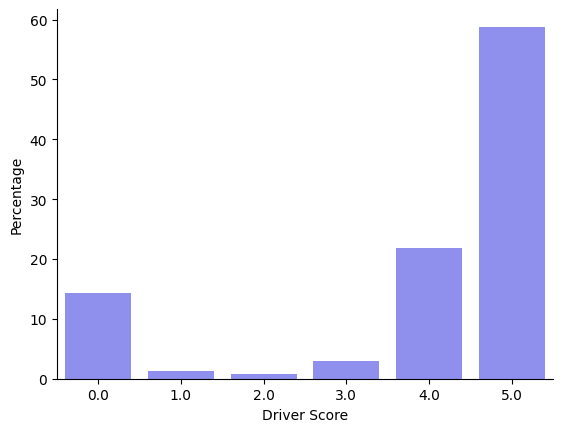

In [92]:
ax=sns.barplot(x='driver_score',y='percentage',data=driver_score_counts,color='blue',alpha=0.5)
ax.set(xlabel='Driver Score',ylabel='Percentage')
sns.despine()
plt.show()

### Проделайте аналогичные шаги для rider_score (оценок клиентов водителями), не забыв построить график. В чем его отличие от распределения оценок водителей?

In [106]:
rider_score=taxi.rider_score\
    .value_counts(normalize=True)\
    .mul(100)\
    .round(2)\
    .reset_index()\
    .rename(columns={'index':'rider_score','rider_score':'percentage'})\
    .sort_values('rider_score')
    

In [107]:
rider_score

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


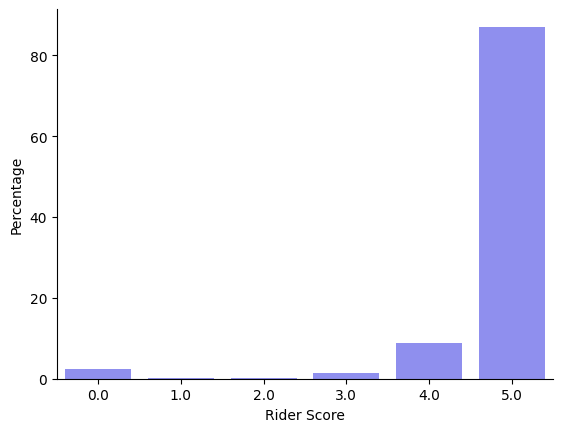

In [109]:
ax=sns.barplot(x='rider_score',y='percentage',data=rider_score,color='blue',alpha=0.5)
ax.set(xlabel='Rider Score',ylabel='Percentage')
sns.despine()
plt.show()